In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target * 100000  # Convert to actual price values

In [44]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
df.size

7085

In [46]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [49]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [50]:
X = df[['area']]
y = df['price']

In [51]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


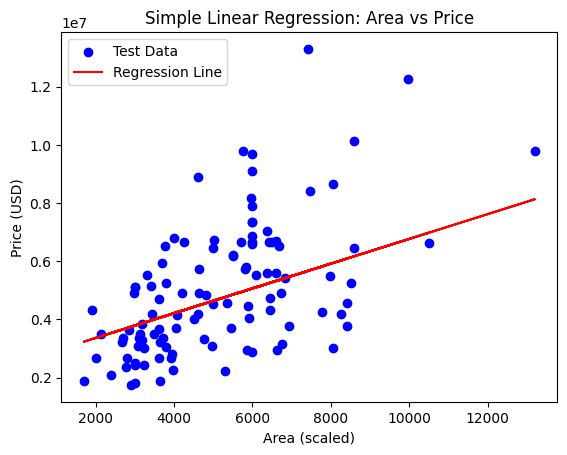

In [52]:
# Plotting the scatter plot and the regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')  # Scatter plot of test data
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Regression line
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area (scaled)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [53]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Output the slope and intercept of the regression line
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Mean Squared Error: 3675286604768.185
R-squared Score: 0.27287851871974644
Slope (Coefficient): 425.72984193878284
Intercept: 2512254.2639593435


In [54]:
# MULTIPLE LINEAR REGRESSION

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convert categorical values to integers (Label Encoding)
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])

# Display the DataFrame with encoded values
print(df['mainroad'])
print(df['guestroom'])
print(df['basement'])
print(df['hotwaterheating'])
print(df['airconditioning'])

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64
0      0
1      0
2      0
3      0
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: guestroom, Length: 545, dtype: int64
0      0
1      0
2      1
3      1
4      1
      ..
540    1
541    0
542    0
543    0
544    0
Name: basement, Length: 545, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Name: hotwaterheating, Length: 545, dtype: int64
0      1
1      1
2      0
3      1
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: airconditioning, Length: 545, dtype: int64


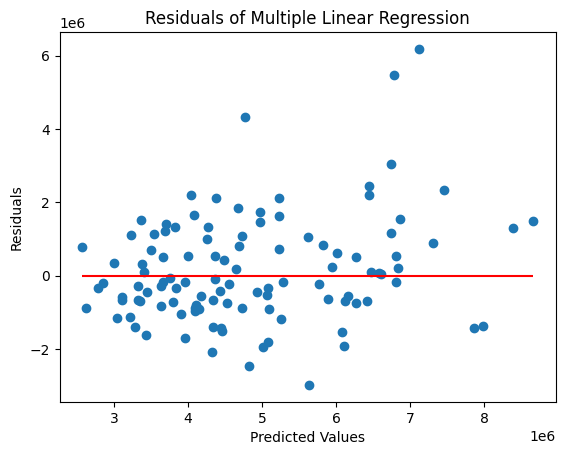

In [56]:
X = df[['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']]  # Independent variables
y = df['price']   # Dependent variable

# Feature Scaling (Standardizing the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the features

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Multiple Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plotting: Residual plot for Multiple Linear Regression
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Multiple Linear Regression')
plt.show()



In [57]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Output the coefficients and intercept of the regression line
print("Coefficients (for Area, Bedrooms, Bathrooms):", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 2180193958839.3157
R-squared Score: 0.5686687784368065
Coefficients (for Area, Bedrooms, Bathrooms): [571738.05571357 197893.49064218 622388.97737817 253260.70304198
 130288.49099166 156280.92986414 167427.41998435 493838.05548708]
Intercept: 4735377.169598941


**MLR - Multiple linear Regression**

**SLR - Simple Linear Regression**

*   MLR should have a **lower** MSE than SLR because it incorporates multiple features, reducing overall error.
*   MLR should have a **higher** R² score than SLR because it accounts for more variance by using multiple features.